In [11]:
import tensorflow as tf
import numpy as np
from grad_cam import get_gradcam_heatmap, combine_image_and_heatmap

import matplotlib.pyplot as plt

In [12]:
# Load model
model = tf.keras.models.load_model("../training/model/trained_model.h5")

In [13]:
# Read data
ds_test = tf.data.experimental.load('../cache/ds_test.tf')

In [14]:
# Evaluate model
model.compile(loss='categorical_crossentropy', metrics='accuracy')
results = model.evaluate(ds_test, verbose=True)
print(f"Test loss {results[0]}, Test acc {results[1]}")

5/5 [==============================] - 0s 65ms/step - loss: 0.6429 - accuracy: 0.6347
Test loss 0.6429365873336792, Test acc 0.6347233653068542


In [15]:
# Model predict
y_test = [label for image,label in list(ds_test.unbatch().as_numpy_iterator())]
y_test_idx = tf.argmax(y_test, axis=1)
predictions = model.predict(ds_test)
predictions_idx = tf.argmax(predictions, axis=1)

In [16]:
# Confusion matrix
conf_mat = tf.math.confusion_matrix(y_test_idx, predictions_idx)
print(conf_mat)

tf.Tensor(
[[597 655]
 [256 986]], shape=(2, 2), dtype=int32)


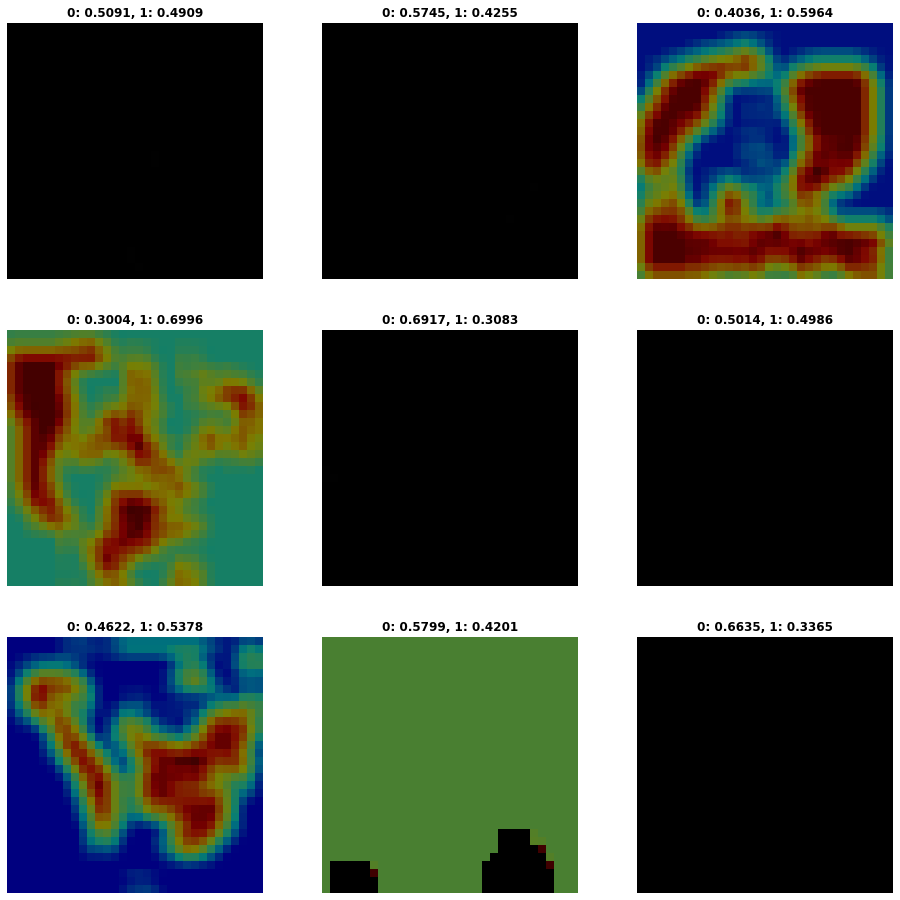

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
axs = axs.flatten()

for data_point, ax in zip(ds_test.unbatch().take(9), axs):
    image, label = data_point
    image = image.numpy()
    label = label.numpy()
    img_array = np.expand_dims(image, axis=0)

    # Print what the top predicted class is
    preds = model.predict(img_array)

    # Generate class activation heatmap
    heatmap = get_gradcam_heatmap(image, model, 'conv2d')
    superimposed_image = combine_image_and_heatmap(image, heatmap, alpha=0.5)

    # Display heatmap
    ax.imshow(superimposed_image)
    font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 12,
    }
    ax.axis('off')
    probs = preds.tolist()[0]
    label_title = f'0: {probs[0]:0.4f}, 1: {probs[1]:0.4f}'
    ax.set_title(label_title, fontdict=font_axis_publish)
